<h1><center>Performance Assessment Task 1 - Linear Regression Modeling</center></h1>
<h3><center> by Bader Ale <center><h3>

# Research Question
Our research questions is as follows: __What caused the highest amount of total charges to the patient during their stay__.

In [17]:
# Importing libraries
import pandas as pd
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell # Importing so we can run multiple lines in one cell
InteractiveShell.ast_node_interactivity = "all" # Code so multiple lines in one cell can be ran simultaenously 

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
# Importing origiginal dataset
df = pd.read_csv('F:\GitHub Repos\WGU_MSDA\D208_Predictive Modeling\medical_clean.csv')

# Data Cleaning  

Target variable for task 1:  __*TotalCharge*__  
Explanatory variable(s) for task 1: __*City*__  , __*State*__  , __*Age*__  , __*Income*__  , __*Gender*__, __*Initial_Admin*__  , __*Complication_Risk*__  , __*Services*__ , __*Initial_Days*__  

In [7]:
# Showing first 5 records
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [12]:
# Creating new dataframe with only those variables of interest
df_model = df[['City', 'State', 'Age', 'Income', 'Gender', 'Doc_visits', 'Initial_admin', 'Complication_risk', 'Services', 'Initial_days', 'TotalCharge']]

## Detection and Treatment of Nulls

In [13]:
# Checking for null values
df_model.isnull().sum()

City                 0
State                0
Age                  0
Income               0
Gender               0
Doc_visits           0
Initial_admin        0
Complication_risk    0
Services             0
Initial_days         0
TotalCharge          0
dtype: int64

Here we can see there are no Nulls in our new dataframe

## Detection and Treatment of Outliers

In [16]:
# Checking datatypes for all variables in new dataframe
df_model.dtypes

City                  object
State                 object
Age                    int64
Income               float64
Gender                object
Doc_visits             int64
Initial_admin         object
Complication_risk     object
Services              object
Initial_days         float64
TotalCharge          float64
dtype: object

We will first focus on the continuous variables and analyze, if any, the outliers. We will normalize our data for ease of visual interpretation

In [36]:
# Performing normalization on the continuous variables for the new dataframe
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df_model[['Age', 'Income', 'Doc_visits', 'Initial_days', 'TotalCharge']]) # Selecting only those numerical variables in our new dataframe
scaled = scaler.fit_transform(df_model[['Age', 'Income', 'Doc_visits', 'Initial_days', 'TotalCharge']])
scaled_df_model = pd.DataFrame(scaled, columns = ('Age', 'Income', 'Doc_visits', 'Initial_days', 'TotalCharge')) # Creating a new dataframe for visualization


MinMaxScaler()

<Axes: >

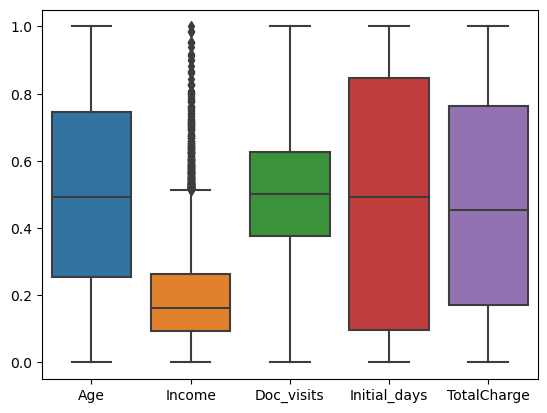

In [37]:
# Plotting the normalized, numerical data 
sns.boxplot(scaled_df_model)

We can see Income is the only numeric variable with outliers. We will use z-scores greater than 3 to eliminate